In [1]:
%load_ext autoreload
%autoreload 2

import pandas
import numpy
import json

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [3]:
df_train = pandas.read_parquet("../src/job/data/origin/train.parquet")
df_test = pandas.read_parquet("../src/job/data/origin/test.parquet")

df_train.head()

,bid_id,bid_timestamp,user_id,app,promoted_entity,country,platform,placement,mediation,os_version,...,"Game length in last 1 days, by Source App","Game length in last 7 days, by Source App","Game length in last 28 days, by Source App","Game Finished Count in last 1 days, by Source App","Game Finished Count in last 7 days, by Source App","Game Finished Count in last 28 days, by Source App","Impression Count in last 1 days, by Promoted Entity","Impression Count in last 7 days, by Promoted Entity","Impression Count in last 28 days, by Promoted Entity",install_label
0,9d4b3f3adbd08cbef105a1f06b94e4e100bf8ab5,2024-03-13T06:41:51.962Z,d033272f5bcfe2e43f819945a7df195e,com.vincentb.mobcontrol,com.nomonkeys.ballblast,DEU,ANDROID,RV,MAXADS,ANDROID_13,...,"{""com.vincentb.mobcontrol"":419.596}","{""com.vincentb.mobcontrol"":12398.599993}","{""com.vincentb.mobcontrol"":12398.599993}","{""com.vincentb.mobcontrol"":6}","{""com.vincentb.mobcontrol"":171}","{""com.vincentb.mobcontrol"":171}",None,"{""com.BallGames.Woodturning"":1,""com.KaueRosa.C...","{""com.BallGames.Woodturning"":1,""com.KaueRosa.C...",0
1,8ff166090acad988a557d97201724797ed762bd2,2024-02-19T17:41:42.332Z,b8aca04c21d0dce1dabbfc3d468207b3,com.tummygames.sliceit,io.voodoo.crowdcity,SWE,ANDROID,INTERSTITIAL,MAXADS,ANDROID_OREO,...,None,None,"{""com.tummygames.sliceit"":3470.764997}",None,None,"{""com.tummygames.sliceit"":59}",None,None,"{""com.AndreyGushchin.BucketCrusher"":3,""com.Bal...",0
2,a8e401b0-d15e-11ee-a3f7-6fb01f553f0a_400800003,2024-02-22T08:44:58.610Z,3184aa31b5d3444bb51b83073997d8bf,1423046460,1617391485,USA,IOS,INTERSTITIAL,IRONSOURCE,IOS_17,...,None,None,None,None,None,None,None,None,None,0
3,1f03f970-ddb4-11ee-8138-b733ec0f0d83_315016232,2024-03-09T01:26:57.967Z,2ef8e2ab4dd442aca9384efe3487ab1d,1345968745,1423046460,USA,IOS,INTERSTITIAL,IRONSOURCE,IOS_16,...,None,None,None,None,None,None,None,None,None,0
4,2d005420-dd81-11ee-857e-b7a7e6fc37d4_2141554481,2024-03-08T19:22:17.094Z,68005592c278180168d9e2d054480747,com.acidcousins.fdunk,com.vincentb.MobControl,DEU,ANDROID,INTERSTITIAL,IRONSOURCE,ANDROID_13,...,None,"{""com.acidcousins.fdunk"":1556.232993,""io.voodo...","{""com.acidcousins.fdunk"":8416.644981,""io.voodo...",None,"{""com.acidcousins.fdunk"":32,""io.voodoo.paper3"":4}","{""com.acidcousins.fdunk"":158,""io.voodoo.paper3...",None,"{""com.aa.puffup"":1,""com.cassette.aquapark"":1}","{""com.BallGames.Woodturning"":1,""com.aa.puffup""...",0


In [4]:
df_train.shape, df_test.shape

((1000000, 89), (100000, 89))

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 89 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   bid_id                                                1000000 non-null  object 
 1   bid_timestamp                                         1000000 non-null  object 
 2   user_id                                               998178 non-null   object 
 3   app                                                   1000000 non-null  object 
 4   promoted_entity                                       1000000 non-null  object 
 5   country                                               1000000 non-null  object 
 6   platform                                              1000000 non-null  object 
 7   placement                                             1000000 non-null  object 
 8   mediation                        

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 89 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   bid_id                                                100000 non-null  object 
 1   bid_timestamp                                         100000 non-null  object 
 2   user_id                                               99765 non-null   object 
 3   app                                                   100000 non-null  object 
 4   promoted_entity                                       100000 non-null  object 
 5   country                                               100000 non-null  object 
 6   platform                                              100000 non-null  object 
 7   placement                                             100000 non-null  object 
 8   mediation                                    

# Check missing data

In [7]:
# Obvious no go features: more than 60% of the data is missing
_missing_data = df_train.isna().sum() / df_train.shape[0]
_missing_data = _missing_data.sort_values(ascending=False).reset_index()
missing_features = _missing_data[_missing_data[0] > 0.3]
missing_features.head(30)

,index,0
0,App installs in last 1 days,0.899488
1,previous_session_start_date,0.859729
2,"Impression Count in last 1 days, by Promoted E...",0.805525
3,session_start_date,0.780264
4,revenues_since_install,0.780264
5,fs_click_count_since_install,0.780264
6,previous_x_session_description,0.780264
7,rv_click_count_since_install,0.780264
8,App installs in last 7 days,0.698971
9,"FS watched in last 1 days, by Source App",0.689434


- A lot numerical values seem to be skewed, we could transform to boolean: App installs with a lot of missing data => 0 or 1
- There should be a couple of power users that install a lot of apps

# Get a an idea of feature distributions

## Target

In [8]:
df_train['install_label'].value_counts()
sov_target = df_train['install_label'].value_counts() / df_train.shape[0]
sov_target

install_label
0    0.969022
1    0.030978
Name: count, dtype: float64

Only 3% of the data is labeled 1 => We'll potentially need to balance the dataset

We might want to:
- Use metrics different from accuracy for the loss function and evaluation
- Balance a bit more the dataset if it improves the model. Though this setup seems to indicate the reality

In [9]:
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
binary_columns = [col for col in numerical_columns if set(df_train[col].dropna().unique()) <= {0, 1}]
numerical_columns = numerical_columns.difference(binary_columns)

# Detect columns with dict, ndarray, or JSON strings
unaggregated_columns = []
for col in df_train.columns:
    first_value = df_train[col].dropna().iloc[0]
    if isinstance(first_value, dict):
        unaggregated_columns.append(col)
    elif isinstance(first_value, numpy.ndarray):
        unaggregated_columns.append(col)
    elif isinstance(first_value, str) and first_value.startswith('{') and first_value.endswith('}'):
        try:
            df_train[col] = df_train[col].apply(lambda x: json.loads(x) if isinstance(x, str) and x.startswith('{') and x.endswith('}') else x)
            unaggregated_columns.append(col)
        except json.JSONDecodeError:
            pass

categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns.difference(unaggregated_columns).append(pandas.Index(binary_columns))

In [10]:
print("Numerical Columns:")
print(numerical_columns)

print("\nUnaggregated Columns:")
print(unaggregated_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['App installs in last 1 days', 'App installs in last 28 days',
       'App installs in last 7 days', 'IAP revenue in last 1 days',
       'IAP revenue in last 28 days', 'IAP revenue in last 7 days',
       'Publisher revenue (VAN) last 1 days',
       'Publisher revenue (VAN) last 28 days',
       'Publisher revenue (VAN) last 7 days', 'app_open_count_since_install',
       'available_disk_space', 'battery', 'fs_click_count_since_install',
       'fs_count_since_install', 'game_count', 'game_count_since_install',
       'game_count_success', 'global_token_index', 'play_time', 'ppi',
       'rv_click_count_since_install', 'rv_count_since_install',
       'session_count_since_install', 'token_index', 'total_disk_space',
       'total_time'],
      dtype='object')

Unaggregated Columns:
['current_x_session_description', 'previous_x_session_description', 'revenues', 'revenues_since_install', 'first_x_session_description', 'previous_session_cpm', 'purchase_since_in

## Numerical columns


- Numerical columns are skewed, we could transform some to boolean
- We could also transform to log, as shown below

/Users/corentin.garet/.pyenv/versions/3.10.6/envs/corentin3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


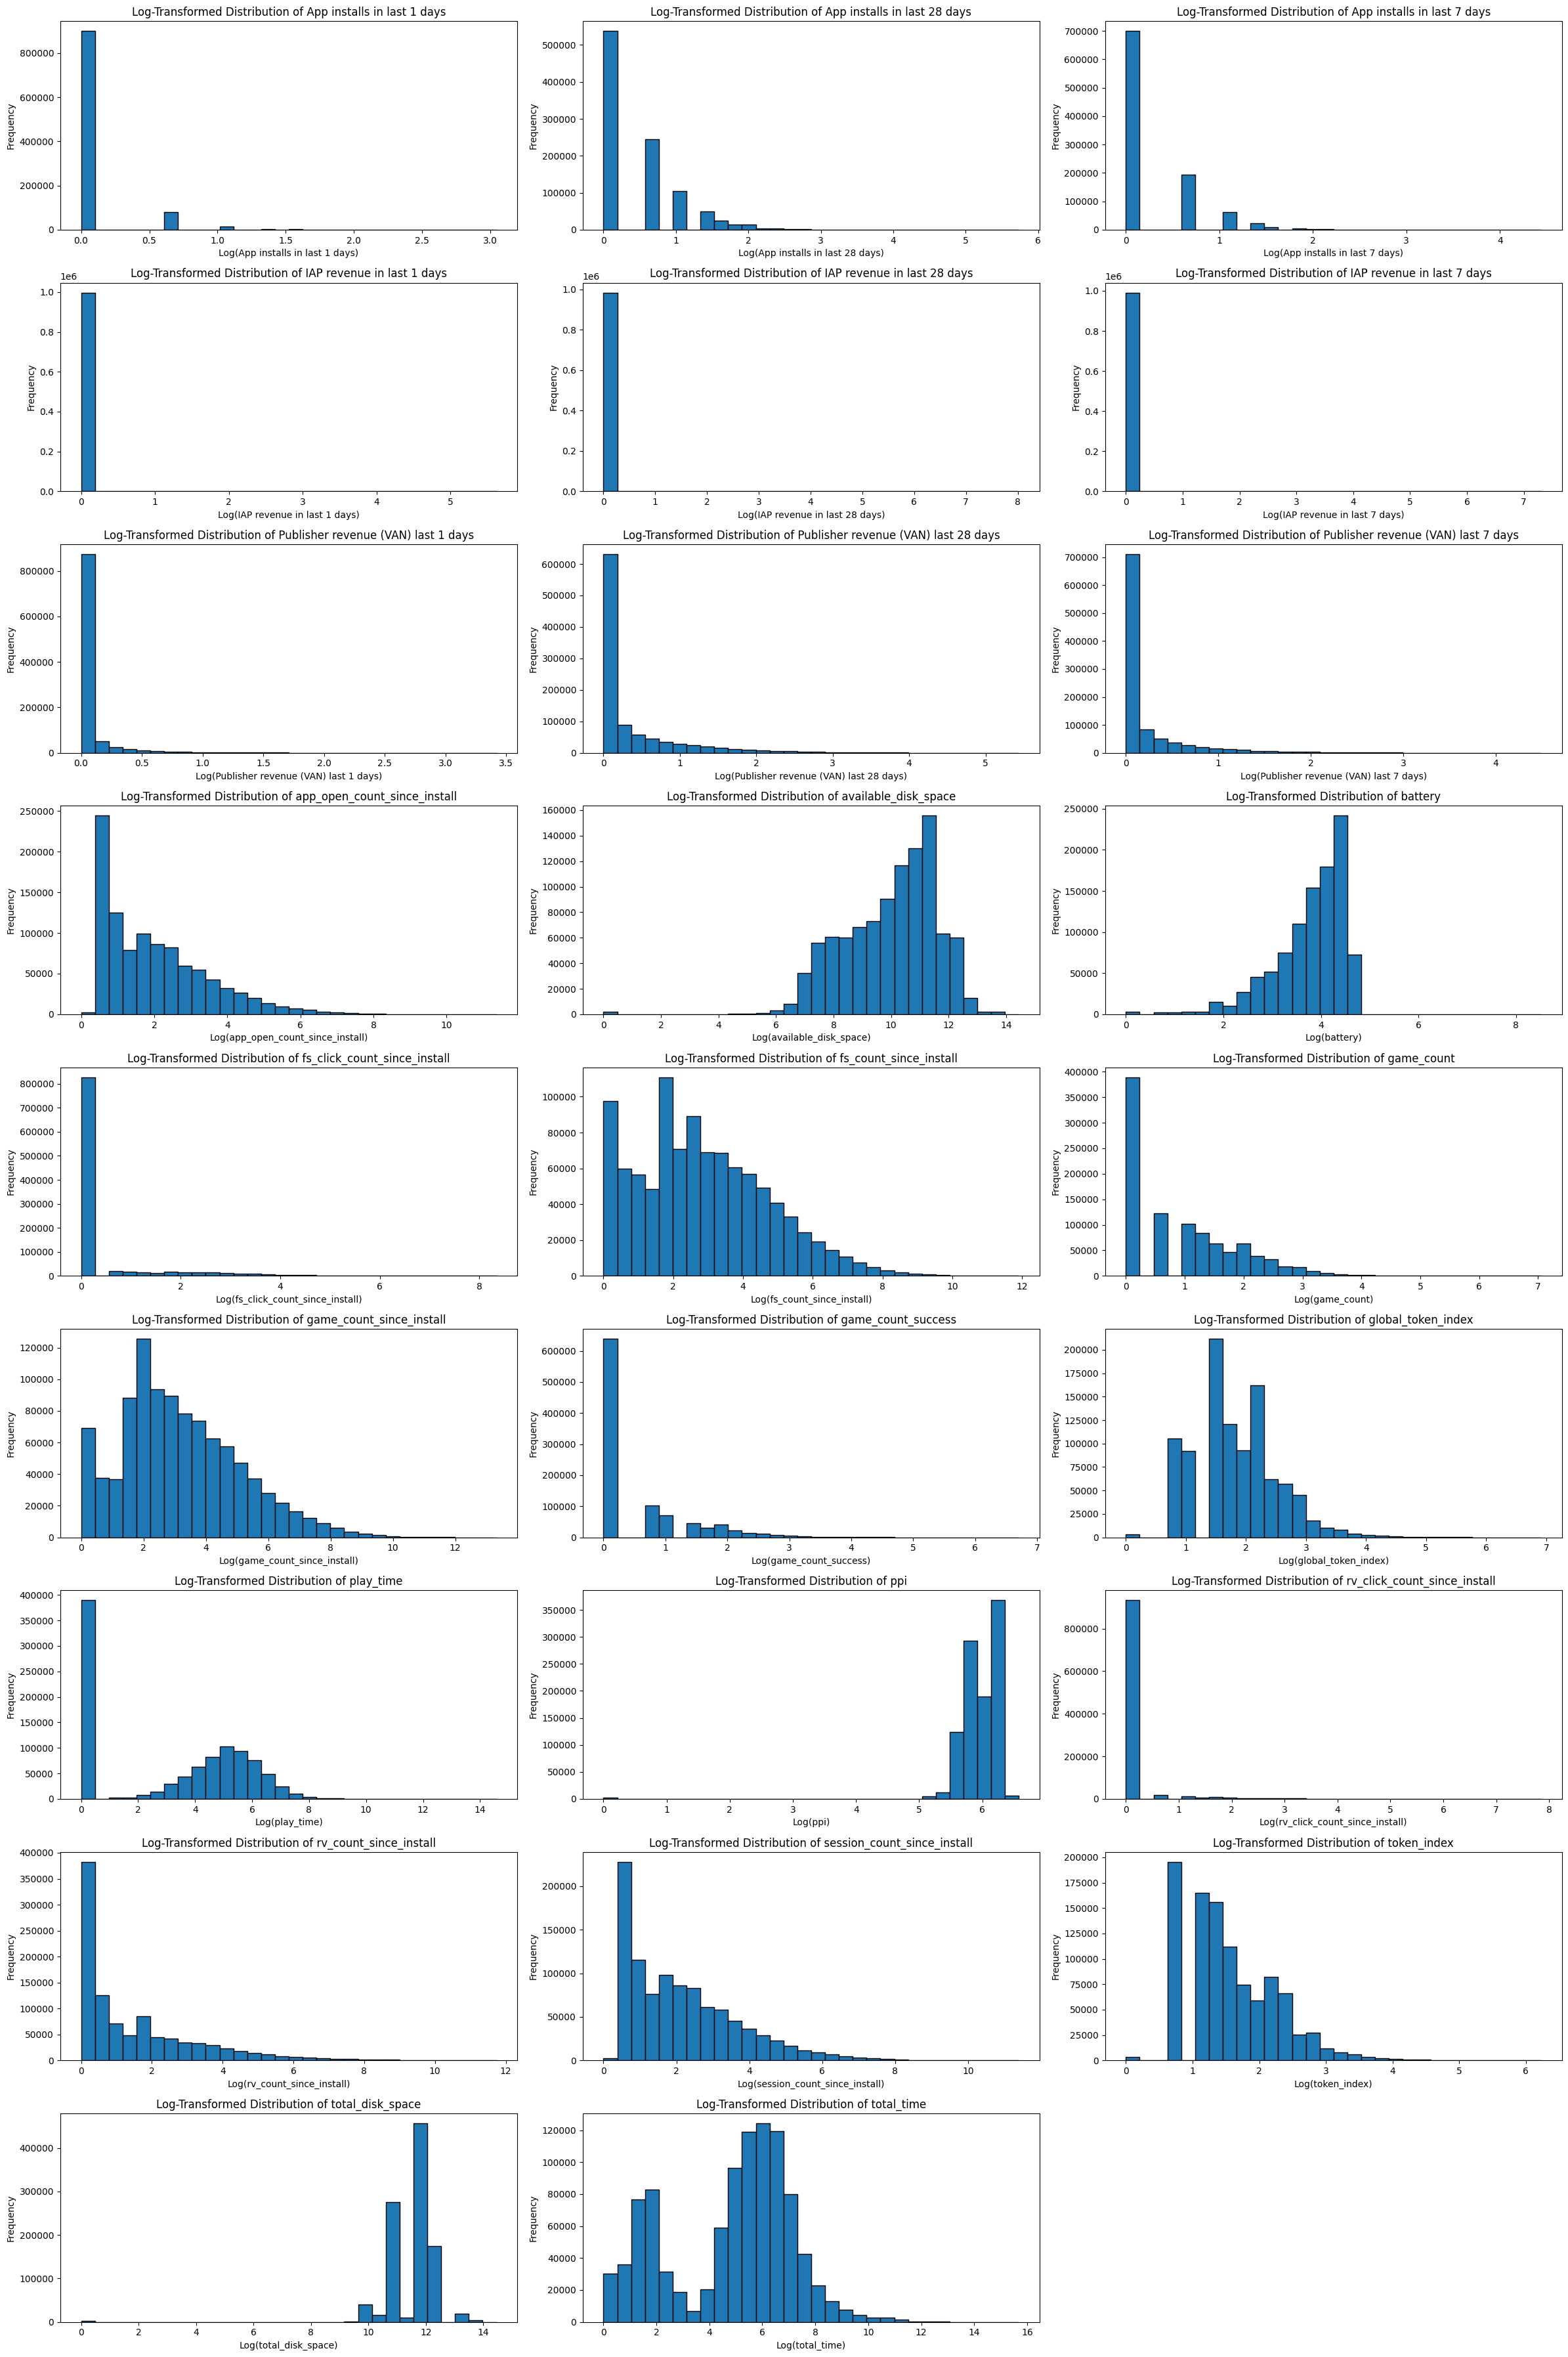

In [12]:
# Plot log-transformed distributions for each numerical feature in a wide figure with several columns
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 8, num_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for i, col in enumerate(numerical_columns):
    # Apply log transformation, adding a small constant to avoid log(0)
    log_data = numpy.log1p(df_train[col].dropna())
    log_data.plot(kind='hist', ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(f"Log-Transformed Distribution of {col}")
    axes[i].set_xlabel(f"Log({col})")
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Binary columns

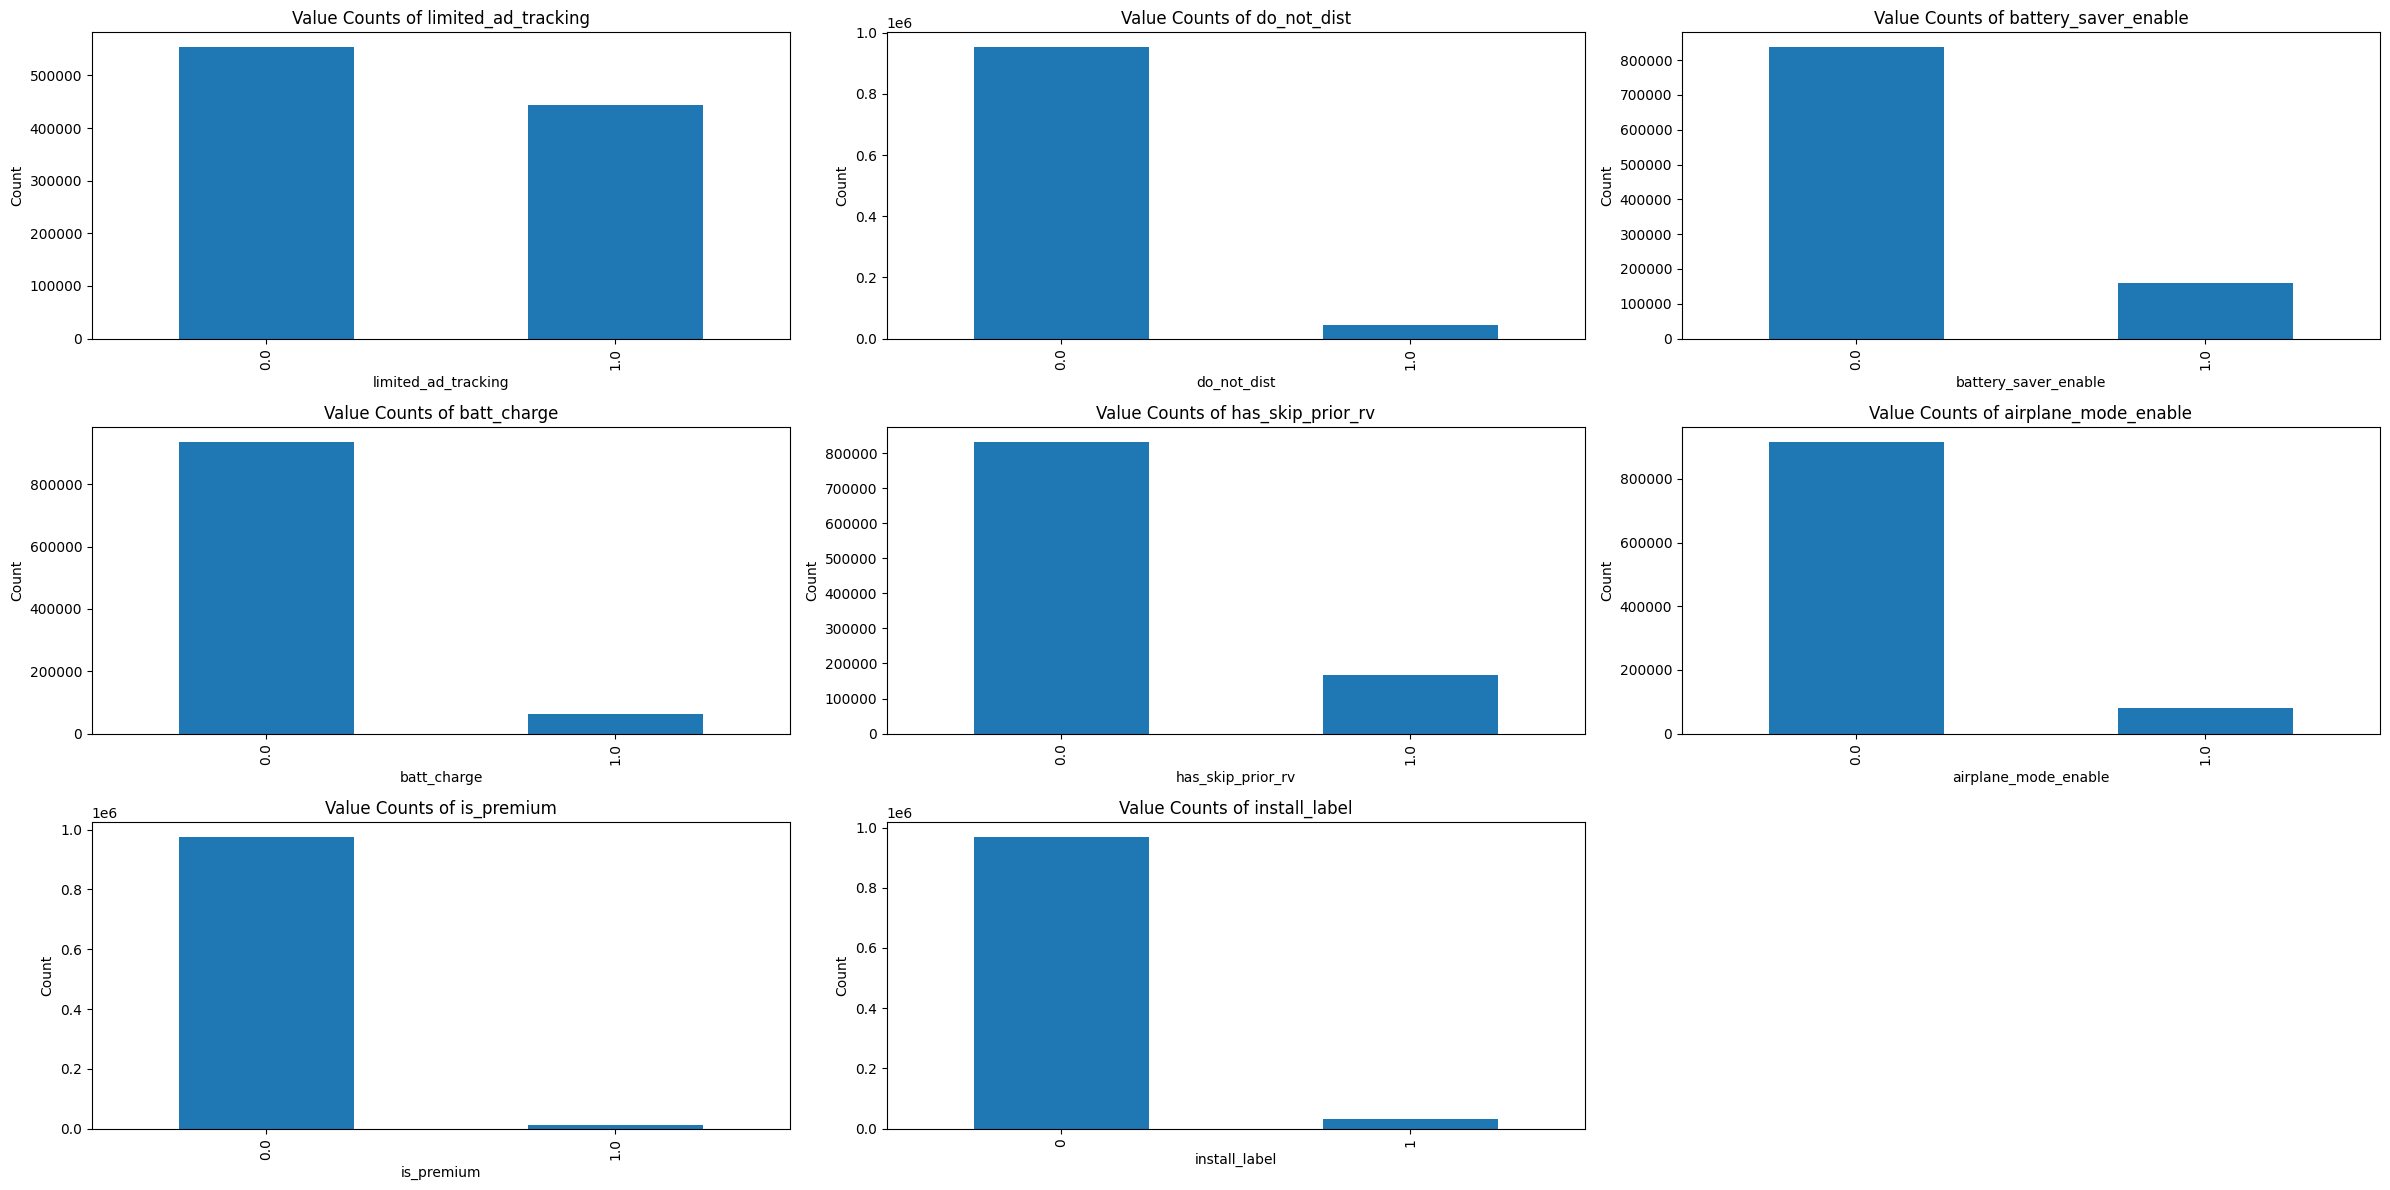

In [13]:
# Plot value counts for each categorical feature in a wide figure with several columns
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(binary_columns) + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 8, num_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for i, col in enumerate(binary_columns):
    df_train[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Value Counts of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Categorical columns

In [14]:
for col in categorical_columns:
    try:
        unique_count = df_train[col].nunique()
        print(f"Number of unique values in {col}: {unique_count}")
    except TypeError as e:
        print(f"Error processing column {col}: {e}")

Number of unique values in app: 239
Number of unique values in bid_id: 999907
Number of unique values in bid_timestamp: 999671
Number of unique values in connection_type: 8
Number of unique values in country: 34
Number of unique values in device_manufacturer: 853
Number of unique values in device_model: 6211
Number of unique values in device_resolution: 2147
Number of unique values in install_date: 808517
Number of unique values in mediation: 2
Number of unique values in os_version: 11
Number of unique values in placement: 2
Number of unique values in platform: 2
Number of unique values in previous_session_start_date: 138568
Number of unique values in promoted_entity: 104
Number of unique values in session_start_date: 216848
Number of unique values in user_id: 910236
Number of unique values in version: 34
Number of unique values in limited_ad_tracking: 2
Number of unique values in do_not_dist: 2
Number of unique values in battery_saver_enable: 2
Number of unique values in batt_charge: 

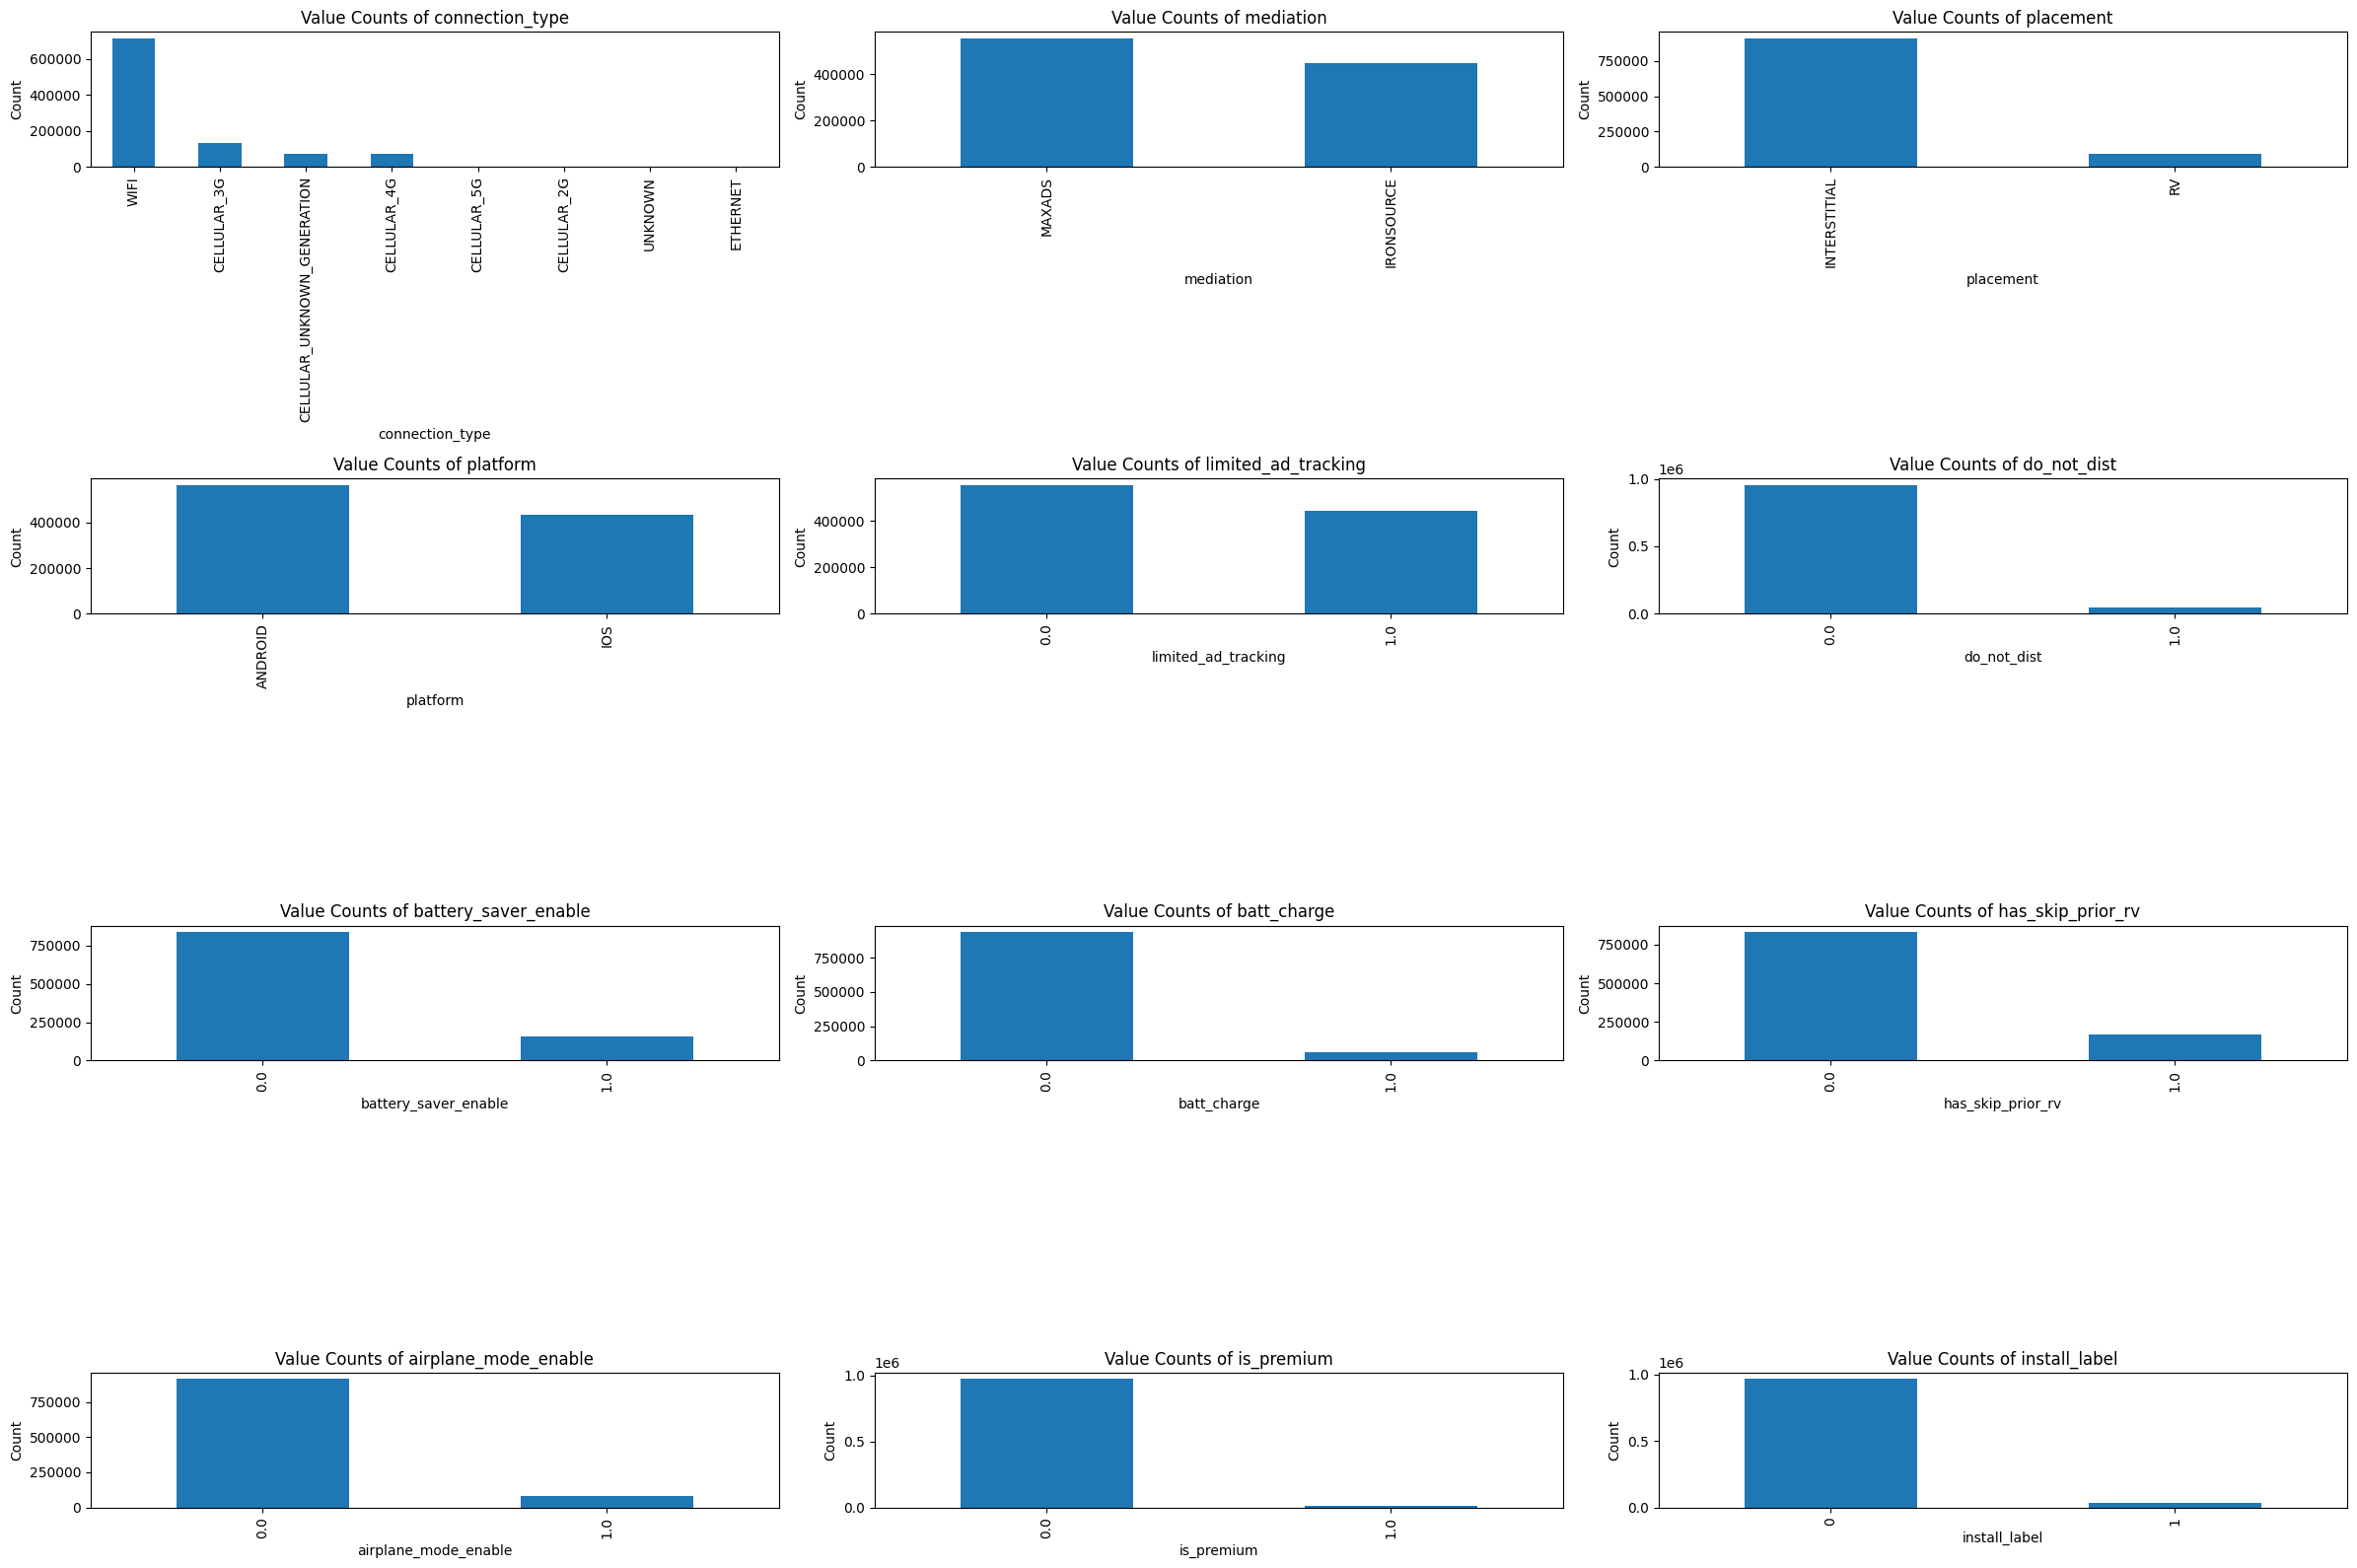

In [15]:
# Plot value counts for categorical features with less than 10 distinct values
num_cols = 3  # Number of columns in the subplot grid
filtered_categorical_columns = [col for col in categorical_columns if df_train[col].nunique() < 10]
num_rows = (len(filtered_categorical_columns) + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 8, num_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for i, col in enumerate(filtered_categorical_columns):
    df_train[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Value Counts of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Feature selection

#### For baseline model

*Numerical features*
- App installs in last 7 days because most correlated => How many apps installed in last 7 days
- fs_click_count_since_install => How much user clicks
- available_disk_space => Can the app be installed?
- battery => Can the app be installed?

*Categorical features*

Basic
- app : The app in itself, we could use something else to grasp differences
- promoted_entity => The place in which the ad is done, way to split users
- placement =>Nature of placement should have an impact on install rate

User_related
- has_skip_prior_rv => User has skipped the previous RV
- airplane_mode_enabled => User has airplane mode enabled

# Correlations

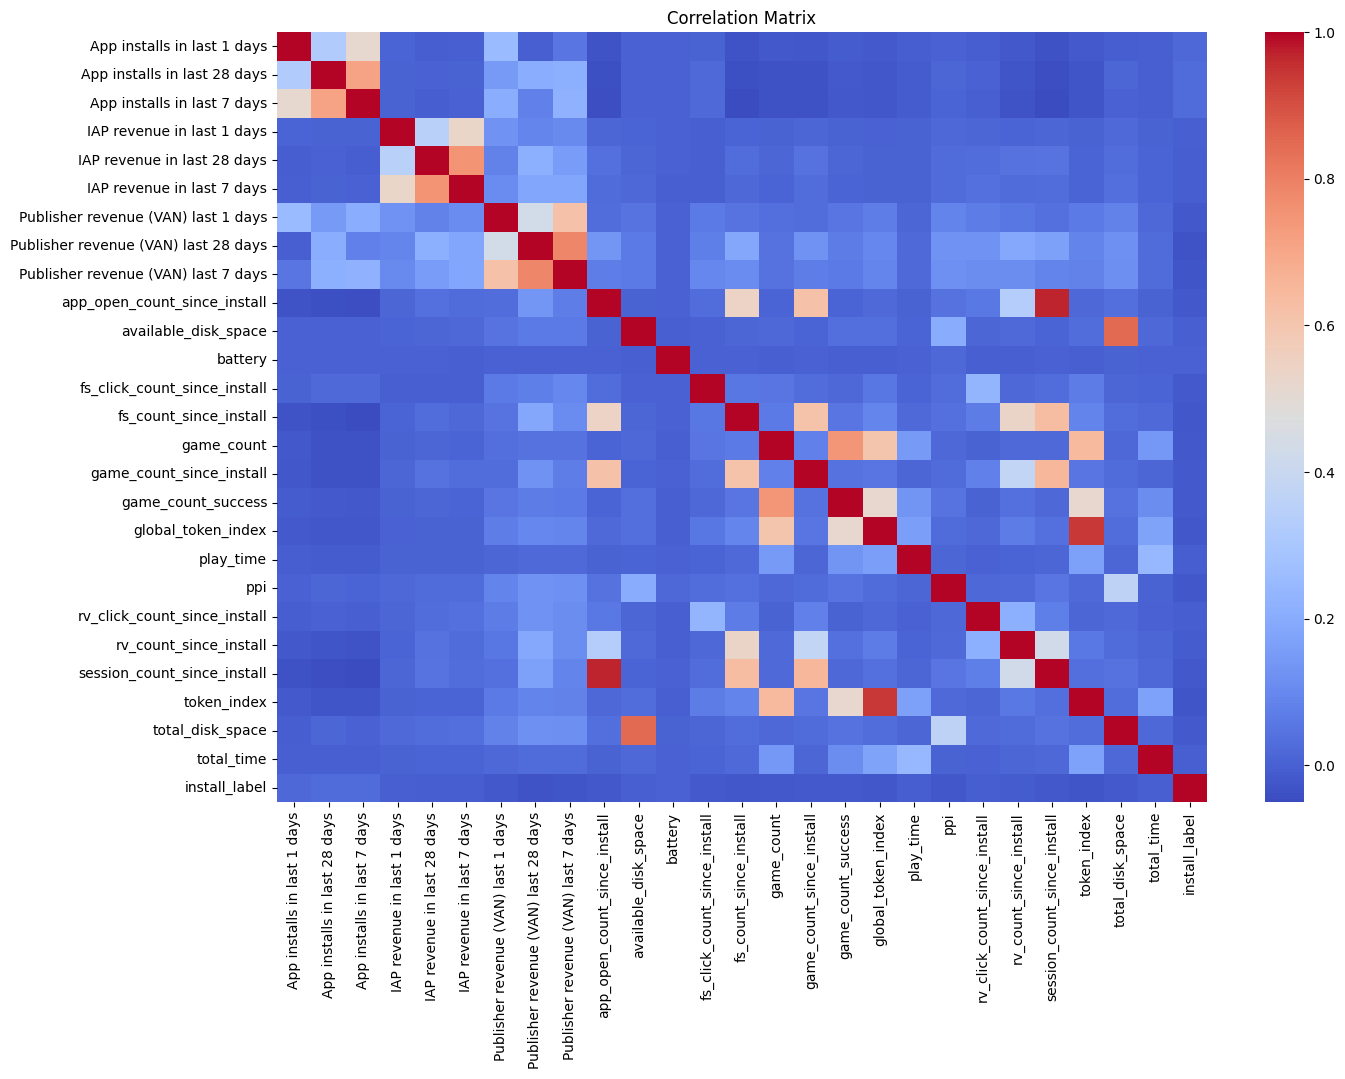

Top 10 features with highest correlation to the target:
install_label                           1.000000
Publisher revenue (VAN) last 28 days    0.031940
Publisher revenue (VAN) last 7 days     0.028096
App installs in last 7 days             0.027260
token_index                             0.026210
App installs in last 28 days            0.025822
global_token_index                      0.025532
ppi                                     0.022885
fs_count_since_install                  0.022251
session_count_since_install             0.021476
app_open_count_since_install            0.019305
Name: install_label, dtype: float64


In [16]:
correlation_features = numerical_columns.tolist() + ["install_label"]
correlation_matrix = df_train[correlation_features].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Find the top 10 features that have the highest correlation with the target
target = 'install_label'  # Assuming 'install_label' is the target column
correlation_with_target = abs(correlation_matrix[target]).sort_values(ascending=False)
top_10_features = correlation_with_target.head(11).index.tolist()  # Including the target itself

print("Top 10 features with highest correlation to the target:")
print(correlation_with_target.head(11))

A lot of the top 10 is part of missing values => confirm that we'll need some feature engineering

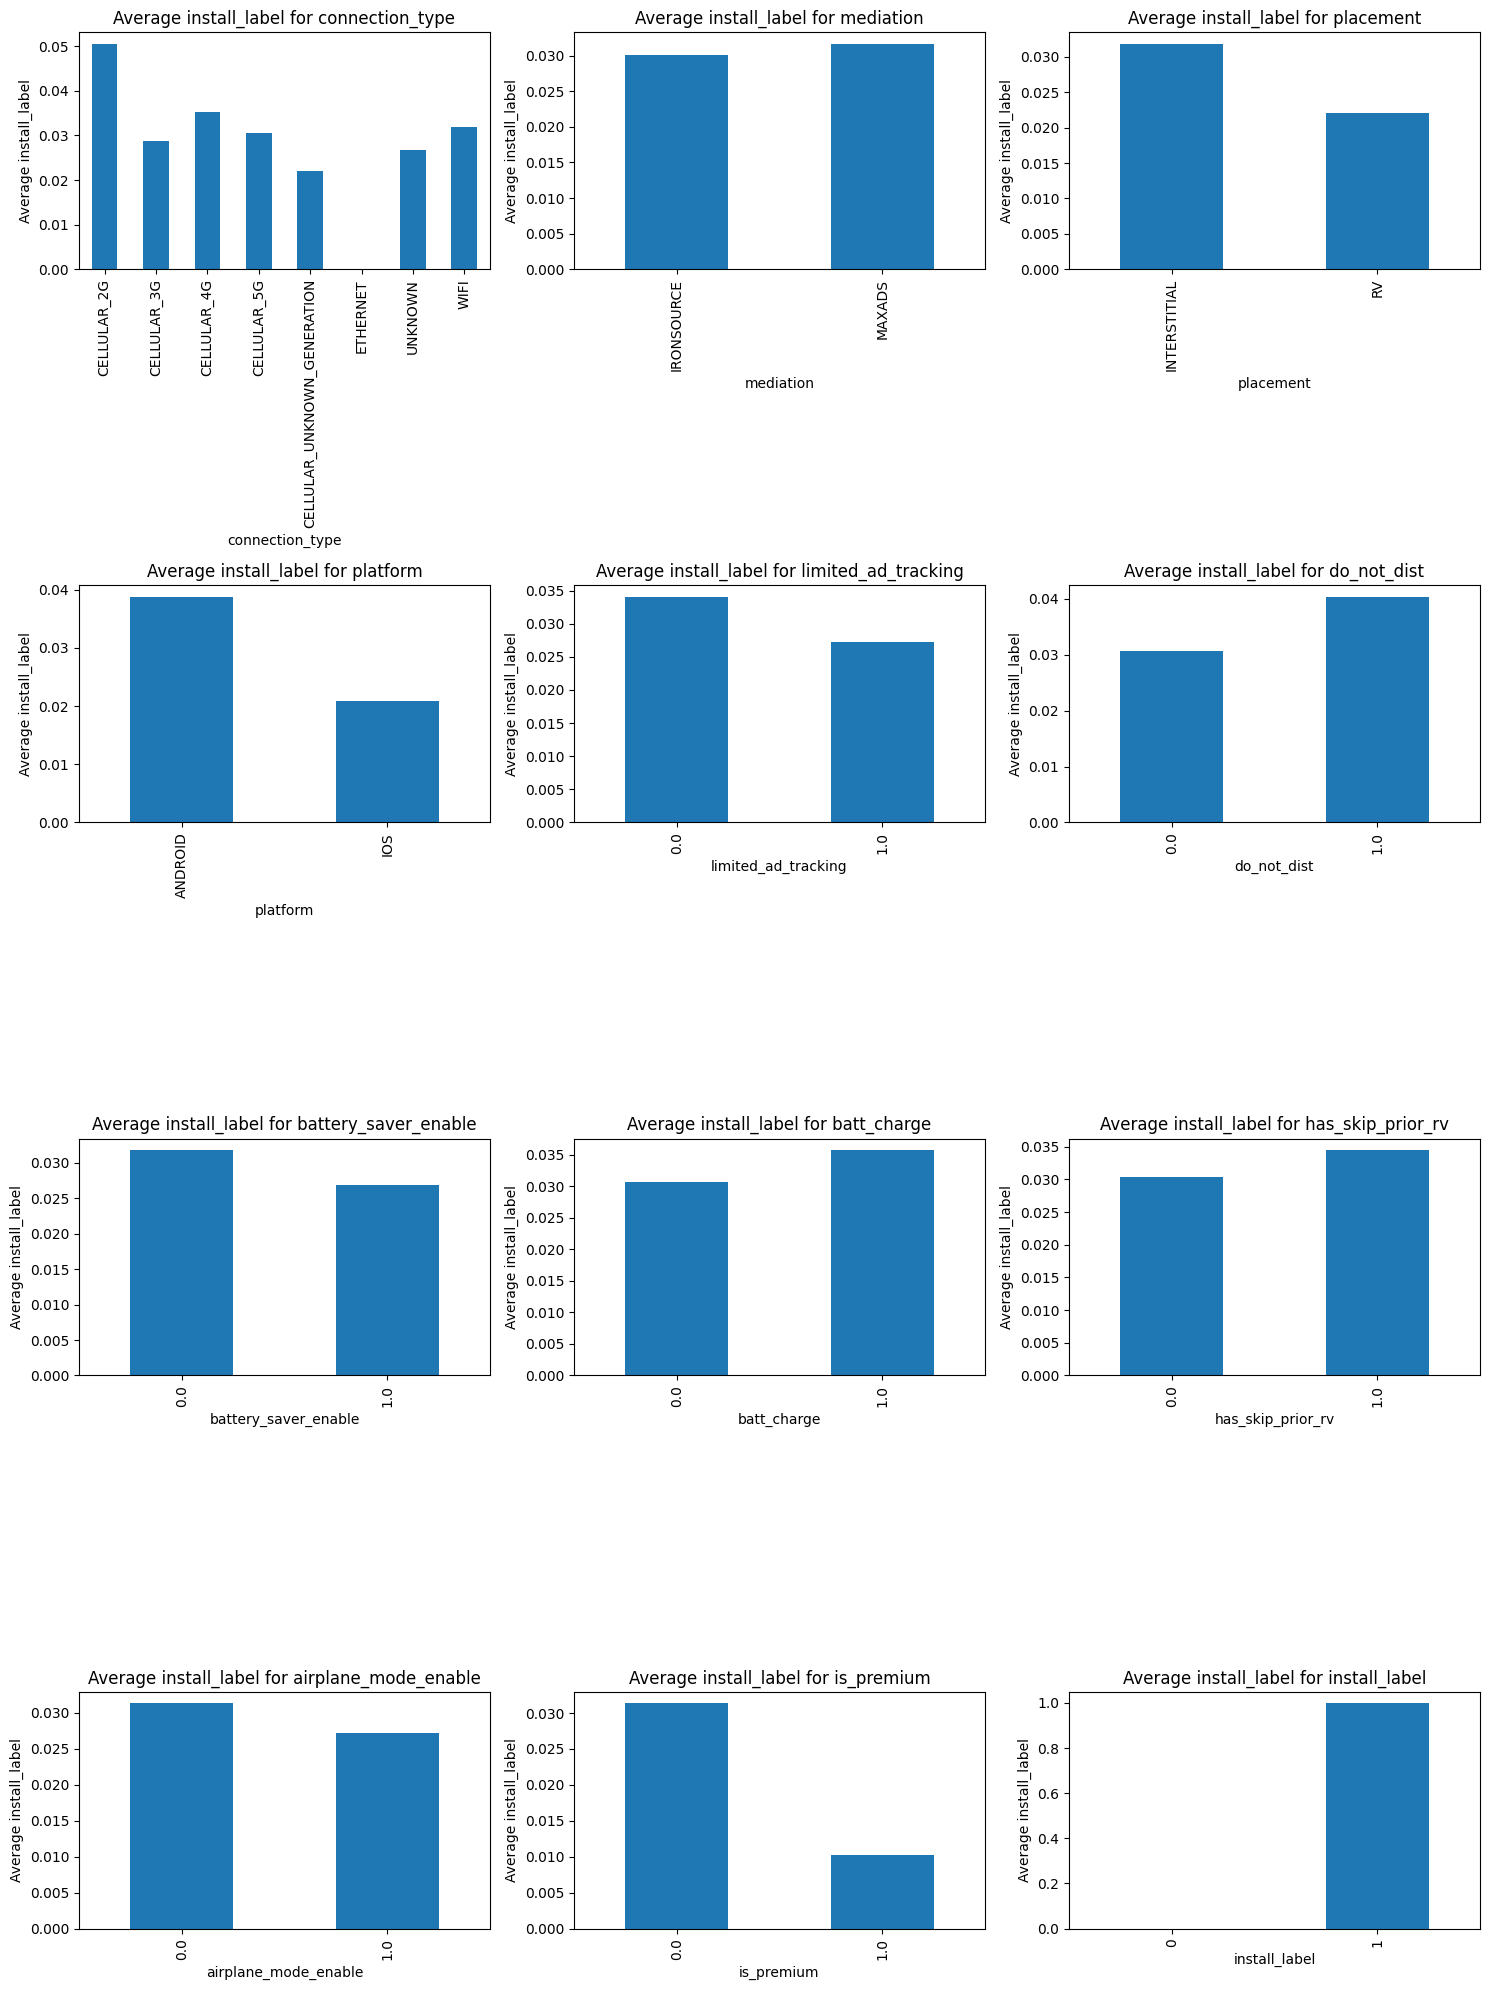

In [17]:
# Calculate the average of install_label for categorical features with less than 10 distinct values
filtered_categorical_columns = [col for col in categorical_columns if df_train[col].nunique() < 10]

average_install_label = {}
for col in filtered_categorical_columns:
    average_install_label[col] = df_train.groupby(col)['install_label'].mean()

# Plot the average install_label for each categorical feature in a grid
num_plots = len(filtered_categorical_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(filtered_categorical_columns):
    avg = average_install_label[col]
    avg.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Average install_label for {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Average install_label")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Explore temporal data

In [11]:
temporal_features = ["bid_timestamp","install_date", "session_start_date"]

for feature in temporal_features:
    df_train[feature] = pandas.to_datetime(df_train[feature])
    df_test[feature] = pandas.to_datetime(df_test[feature])

In [12]:
df_train["bid_timestamp"].max(), df_train["bid_timestamp"].min(), df_train["bid_timestamp"].max() - df_train["bid_timestamp"].min()

(Timestamp('2024-03-14 23:59:58.467000+0000', tz='UTC'),
 Timestamp('2024-02-15 16:00:18.684000+0000', tz='UTC'),
 Timedelta('28 days 07:59:39.783000'))

In [13]:
df_test["bid_timestamp"].max(), df_test["bid_timestamp"].min(), df_test["bid_timestamp"].max() - df_test["bid_timestamp"].min()

(Timestamp('2024-03-17 09:59:03.103000+0000', tz='UTC'),
 Timestamp('2024-03-15 00:00:02.202000+0000', tz='UTC'),
 Timedelta('2 days 09:59:00.901000'))

# Feature engineering ideas

- For really skewed data, we could transform to boolean: App installs with a lot of missing data => 0 or 1

# Split train and val

In [14]:
# Sort the data by timestamp
df_train = df_train.sort_values(by='bid_timestamp')

# Define the ratio for splitting
val_ratio = 0.2  # Example validation ratio

# Calculate the number of validation samples
val_size = int(len(df_train) * val_ratio)

# Split the data
train_data = df_train[:-val_size]
val_data = df_train[-val_size:]


In [16]:
# Check data sizes
print("Training set size:", len(train_data) / len(df_train))
print("Validation set size:", len(val_data) / len(df_train))

Training set size: 0.8
Validation set size: 0.2


In [17]:
# Check that distributions are roughly the same between train and val
target = 'install_label'
sov_target_train = train_data[target].value_counts() / len(train_data)
sov_target_val = val_data[target].value_counts() / len(val_data)
sov_target_train, sov_target_val


(install_label
 0    0.968686
 1    0.031314
 Name: count, dtype: float64,
 install_label
 0    0.970365
 1    0.029635
 Name: count, dtype: float64)

In [18]:
# Nb distinct users
train_data['user_id'].nunique() / len(train_data), val_data['user_id'].nunique() / len(val_data)

(0.91716625, 0.948595)

In [19]:
# Nb distinct apps
train_data['app'].nunique(), val_data['app'].nunique()

(238, 231)

In [20]:
# Nb distinct promoted_entity
train_data['promoted_entity'].nunique(), val_data['promoted_entity'].nunique()

(104, 104)

We should be good to go with this setup: avoiding temporal leakage and ensuring that distributions are roughly the same between train and val.

# Train baseline classification model

In [22]:
train_data.columns

Index(['bid_id', 'bid_timestamp', 'user_id', 'app', 'promoted_entity',
       'country', 'platform', 'placement', 'mediation', 'os_version',
       'device_manufacturer', 'device_resolution', 'connection_type',
       'limited_ad_tracking', 'do_not_dist', 'battery_saver_enable',
       'batt_charge', 'has_skip_prior_rv', 'airplane_mode_enable', 'battery',
       'ppi', 'game_count_success', 'game_count', 'total_time', 'play_time',
       'available_disk_space', 'total_disk_space', 'fs_count_since_install',
       'rv_count_since_install', 'fs_click_count_since_install',
       'rv_click_count_since_install', 'session_count_since_install',
       'game_count_since_install', 'app_open_count_since_install',
       'current_x_session_description', 'previous_x_session_description',
       'revenues', 'revenues_since_install', 'first_x_session_description',
       'device_model', 'version', 'global_token_index', 'token_index',
       'previous_session_cpm', 'purchase_since_install', 'is_prem

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, f1_score

# Transform data
train_data['App installs in last 7 days'] = (train_data['App installs in last 7 days'] > 0).astype(int)
train_data['fs_click_count_since_install'] = (train_data['fs_click_count_since_install'] > 0).astype(int)

val_data['App installs in last 7 days'] = (val_data['App installs in last 7 days'] > 0).astype(int)
val_data['fs_click_count_since_install'] = (val_data['fs_click_count_since_install'] > 0).astype(int)

# Define features and target
selected_features = [
    'available_disk_space', 'battery', 'app', 'promoted_entity', 
    'placement', 'connection_type', 'platform', 'is_premium', 
    'has_skip_prior_rv', 'airplane_mode_enable', 'App installs in last 7 days', 'fs_click_count_since_install'
]
X_train = train_data[selected_features]
y_train = train_data['install_label']
X_val = val_data[selected_features]
y_val = val_data['install_label']

/var/folders/z4/423w_8kd5yj42hmd2gvnky0c0000gp/T/ipykernel_91959/2219384965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['App installs in last 7 days'] = (train_data['App installs in last 7 days'] > 0).astype(int)
/var/folders/z4/423w_8kd5yj42hmd2gvnky0c0000gp/T/ipykernel_91959/2219384965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['fs_click_count_since_install'] = (train_data['fs_click_count_since_install'] > 0).astype(int)
/var/folders/z4/423w_8kd5yj42hmd2gvnky0c0000gp

In [24]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Concatenate train and validation data for consistent encoding
combined_data = pd.concat([X_train, X_val], keys=['train', 'val'])

# Ensure all categorical columns are treated as strings
categorical_features = ['app', 'promoted_entity', 'placement', 'connection_type', 'platform', 'is_premium', 'has_skip_prior_rv', 'airplane_mode_enable']
for feature in categorical_features:
    combined_data[feature] = combined_data[feature].astype(str)

# Initialize label encoders for each categorical feature
encoders = {feature: LabelEncoder() for feature in categorical_features}

# Fit and transform the combined data for each categorical feature
for feature in categorical_features:
    combined_data[feature] = encoders[feature].fit_transform(combined_data[feature])

# Split back into train and validation sets
X_train = combined_data.loc['train']
X_val = combined_data.loc['val']

In [25]:
from sklearn.metrics import recall_score, precision_score

In [26]:
# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limit tree depth
    min_samples_split=10,  # Require more samples to split
    min_samples_leaf=5,  # Require a minimum number of samples in leaf nodes
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict probabilities
y_train_pred_proba = rf_model.predict_proba(X_train)[:, 1]
y_val_pred_proba = rf_model.predict_proba(X_val)[:, 1]

# Calculate log-loss
train_log_loss = log_loss(y_train, y_train_pred_proba)
val_log_loss = log_loss(y_val, y_val_pred_proba)

# Predict classes
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)

# Calculate f1 score
train_f1_score = f1_score(y_train, y_train_pred)
val_f1_score = f1_score(y_val, y_val_pred)

recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
# Print results
print(f"Training Log-Loss: {train_log_loss}")
print(f"Validation Log-Loss: {val_log_loss}")
print(f"Training F1 Score: {train_f1_score}")
print(f"Validation F1 Score: {val_f1_score}")


Training Log-Loss: 0.640682913832645
Validation Log-Loss: 0.6409526465251595
Training F1 Score: 0.08823240140177965
Validation F1 Score: 0.07965623525395821


In [27]:
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall, precision

(0.6693099375738147, 0.04234809342841283)

In [28]:
from sklearn.metrics import precision_recall_curve, f1_score

# Predict probabilities for validation set
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)
print("Best F1 Score:", f1_scores[optimal_idx])

# Apply the optimal threshold
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate with the new threshold
new_f1 = f1_score(y_val, y_pred)
print("F1 Score with Optimal Threshold:", new_f1)

Optimal Threshold: 0.5792187781642455
Best F1 Score: 0.09064521926261869
F1 Score with Optimal Threshold: 0.09064549728345016
